In [2]:
"""
                        ~ Notable fields/methods & Distributions ~

numpy
 - .quantile()

scipy.stats
 - .iqr()

scipy.stats.uniform
 - .cdf()
 - .rvs()  # e.g. to Generate 1000 wait times between 0 and 30 mins
  -- wait_times = uniform.rvs(0,30,size=1000)

scipy.stats.binom
 - .rvs()
 - .pmf()  # e.g. probability of getting 7 heads (successes) in 10 coin flips
  -- binom.pmf("number of successes", "number of trials", "probability of success")

 - .cdf()  # e.g. probability of getting 7 heads or less in 10 coin flips
  -- binom.cdf("number of successes", "number of trials", "probability of success")
  -- "1 - binom.cdf()"  # e.g. probability of getting more than 7 successes

scipy.stats.norm
 - .cdf()
 - .ppf()
 - .rvs()

scipy.stats.poisson
 - .pmf()
 - .cdf()

scipy.stats.expon
 - .cdf()

Main Distributions:
 - discrete uniform     # rolling dice
 - continuous uniform   # waiting for a bus
 - binomial             # success/failure of flipping a coin 10 times
 - normal/gaussian      # clt, mean, & sd, 1 SD 68% | 2 SD 95% | 3 SD 99.7%
 - poisson              # events over some span of time

Other Distributions:
 - exponential # related to poisson
 - t
 - log-normal
"""
import pandas
import numpy
import scipy
from scipy.stats import iqr, uniform, binom, norm, poisson, expon, t
import matplotlib.pyplot as plt

data_folder = '../../data'
# types: A = super center, B = discount store, C = neighborhood market
df_walmart = pandas.read_csv(f'{data_folder}/walmart_sales_subset.csv', index_col=0)
df_homeless = pandas.read_csv(f'{data_folder}/homeless.csv', index_col=0)
df_amir = pandas.read_csv(f'{data_folder}/amir_deals.csv',index_col=0)
# simplify df_amir to just 100 observations
df_amir = pandas.DataFrame(df_amir[:100])

In [3]:
df_walmart.head()

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
1,1,A,1,2010-03-05,21827.90,False,8.055556,0.693452,8.106
2,1,A,1,2010-04-02,57258.43,False,16.816667,0.718284,7.808
3,1,A,1,2010-05-07,17413.94,False,22.527778,0.748928,7.808
4,1,A,1,2010-06-04,17558.09,False,27.050000,0.714586,7.808


In [4]:
df_homeless.head()

,region,state,individuals,family_members,state_pop
0,East South Central,Alabama,2570.0,864.0,4887681
1,Pacific,Alaska,1434.0,582.0,735139
2,Mountain,Arizona,7259.0,2606.0,7158024
3,West South Central,Arkansas,2280.0,432.0,3009733
4,Pacific,California,109008.0,20964.0,39461588


In [5]:
df_amir.head()

,product,client,status,amount,num_users
1,Product F,Current,Won,7389.52,19
2,Product C,New,Won,4493.01,43
3,Product B,New,Won,5738.09,87
4,Product I,Current,Won,2591.24,83
5,Product E,Current,Won,6622.97,17


In [6]:
# df_amir.head()
# df_amir.info()
# df_amir['num_users'].sort_values()
numpy.quantile(df_amir['num_users'],[0, 0.25, 0.50, 0.75, 1])

array([ 1.  , 15.75, 32.5 , 51.25, 99.  ])

In [7]:
df_homeless.groupby('region')['individuals'].agg([numpy.mean,numpy.median])

,mean,median
region,,
East North Central,5081.200000,5209.0
East South Central,3117.000000,2652.5
Mid-Atlantic,18012.666667,8163.0
Mountain,3561.375000,1926.5
New England,2150.500000,1142.5
Pacific,28427.200000,11139.0
South Atlantic,5806.666667,3928.0
West North Central,1995.857143,1711.0
West South Central,6710.500000,2681.5


In [8]:
nu = df_amir['num_users']
iqr = [numpy.quantile(nu,0.25),numpy.quantile(nu,0.75),scipy.stats.iqr(nu)]
iqr

[15.75, 51.25, 35.5]

In [9]:
51.25-15.75

35.5

In [10]:
numpy.random.seed(2022)
# _practice_ The Binomial Distribution
binom.rvs(
    3,      # events (this can be the num of coin flips, num of deals, etc.)
    0.30,   # probability of success (there is a 30% chance a deal will succeed)
    size=1  # num of trials
)
# 3 deals (num events) in 1 week (num trials)

array([0])

In [11]:
# 3 deals per week over 52 weeks. Each deal has a 30% chance of success
sim_year = binom.rvs(
    3, # events (e.g. 3 deals)
    0.30, # probability of success (based on prior years' success rate)
    size=52 # trials (weeks in a year)
)
# in week 1 there were 2 successes
# week 2 had 0 successes
# week 3 had 2 successes
# week 4 had 0 successes
# week 5 had 1 success
[sim_year]

[array([1, 0, 0, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 0, 1, 3, 0, 1, 0, 0,
        1, 0, 1, 2, 1, 0, 1, 1, 1, 3, 0, 2, 1, 1, 2, 1, 2, 0, 0, 0, 1, 1,
        1, 1, 1, 0, 2, 0, 1, 0])]

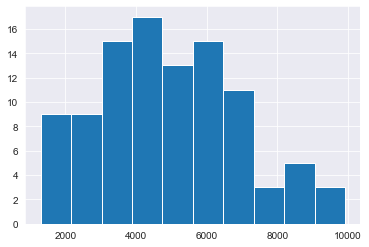

In [12]:
# _practice_ The Normal Distribution
df_amir['amount'].hist()
plt.show()

# Normal distribution

In [13]:
mean = 5000
standard_deviation = 2000

# What's the probability of Amir closing a deal worth less than $7500?
norm.cdf(
    7500,               # target?
    mean,               # mean
    standard_deviation  # standard deviation
)

0.8943502263331446

In [14]:
# What's the probability of Amir closing a deal worth more than $1000?
1 - norm.cdf(1000, mean, standard_deviation)

0.9772498680518208

In [15]:
# What's the probability of Amir closing a deal worth between $3000 and $7000?
norm.cdf(7000,mean,standard_deviation)-norm.cdf(3000,mean,standard_deviation)

0.6826894921370859

In [16]:
# What amount will 25% of Amir's sales be less than?
norm.ppf(0.25,mean,standard_deviation)

3651.0204996078364

In [17]:
# Simulate a year's worth of sales
[norm.rvs(mean,standard_deviation,size=52)]

[array([3321.25664649, 3674.11741964, 5340.80778474, 4810.06067548,
        4709.93993352, 5386.4665384 , 5407.60702577, 2287.68142237,
        5114.16739356, 5024.11027048, 4945.30289073, 5557.28669711,
        4404.26241549, 7139.29630944, 6810.96322829, 4473.33479979,
        7376.99500728, 6305.05791121, 2637.941117  , 2970.21986076,
        3065.34455556, 7752.45391212, 5843.12619157, 7200.38045458,
        5632.80198497, 6866.82457691, 4722.67600148, 2846.68442797,
        3462.91406593, 4700.56916262, 5802.766059  , 6577.07049098,
        4907.9461309 , 4144.77251673, 8094.03419277, 5108.11794784,
        4166.66602056, 4574.7085451 , 5467.52597763, 6358.79311979,
        5962.68174367, 7234.60909247, 3614.45028314, 6275.09591677,
        3625.510511  , 6020.36609942, 3463.00449953, 2045.47826227,
        3341.07276022, 3404.15883098, 4698.4118888 , 6864.76290015])]

# Poisson Distribution

In [18]:
# lambda is the average number of events per time span
# e.g. sales rep responds to an avg of 4 leads per 1 day
lam = 4
# probability rep responds to 5 leads in 1 day
poisson.pmf(5,lam)

0.1562934518505317

In [19]:
# probability rep responds to 2 leads or fewer in 1 day
poisson.cdf(2,lam)

0.23810330555354436

In [20]:
# probability of responding to more than 10 leads in 1 day
1 - poisson.cdf(10,lam)

0.0028397661205137315

In [21]:
# Exponential Distribution
# amount of time till someone pays off their loan
# amount of time till someone walks in the store
avg_time_to_respond = 2.5  # hours

In [22]:
# probability of taking less than an hour
expon.cdf(1,scale=avg_time_to_respond)

0.3296799539643607

In [23]:
# probability of taking more than 4 hours
1 - expon.cdf(4,avg_time_to_respond)

0.2231301601484298